In [1]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pprint import pprint
import pymongo
from bson.json_util import dumps, loads


from IPython.display import Markdown, display
from IPython.display import HTML

def printmd(string):
    display(Markdown(string))


In [2]:
all_data = pd.read_csv("./data/WDIData.csv")

In [3]:
all_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN,NaN
383835,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.658057,NaN,NaN
383836,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.4,NaN


In [4]:
snapshot = all_data[["Country Name", "Indicator Name", "1960", "1970", "1980", "1990", "2000",  "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
snapshot

,Country Name,Indicator Name,1960,1970,1980,1990,2000,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,11.469146,15.658101,16.097824,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN
1,Africa Eastern and Southern,Access to electricity (% of population),NaN,NaN,NaN,NaN,20.086007,28.233373,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,8.491610,16.241064,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN
3,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",NaN,NaN,NaN,NaN,56.083452,62.520824,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN
4,Africa Eastern and Southern,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,Zimbabwe,Women who believe a husband is justified in be...,NaN,NaN,NaN,NaN,NaN,NaN,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,Women who were first married by age 15 (% of w...,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN
383835,Zimbabwe,Women who were first married by age 18 (% of w...,NaN,NaN,NaN,NaN,NaN,NaN,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.658057,NaN
383836,Zimbabwe,Women's share of population ages 15+ living wi...,NaN,NaN,NaN,53.2,56.300000,58.500000,58.700000,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.4


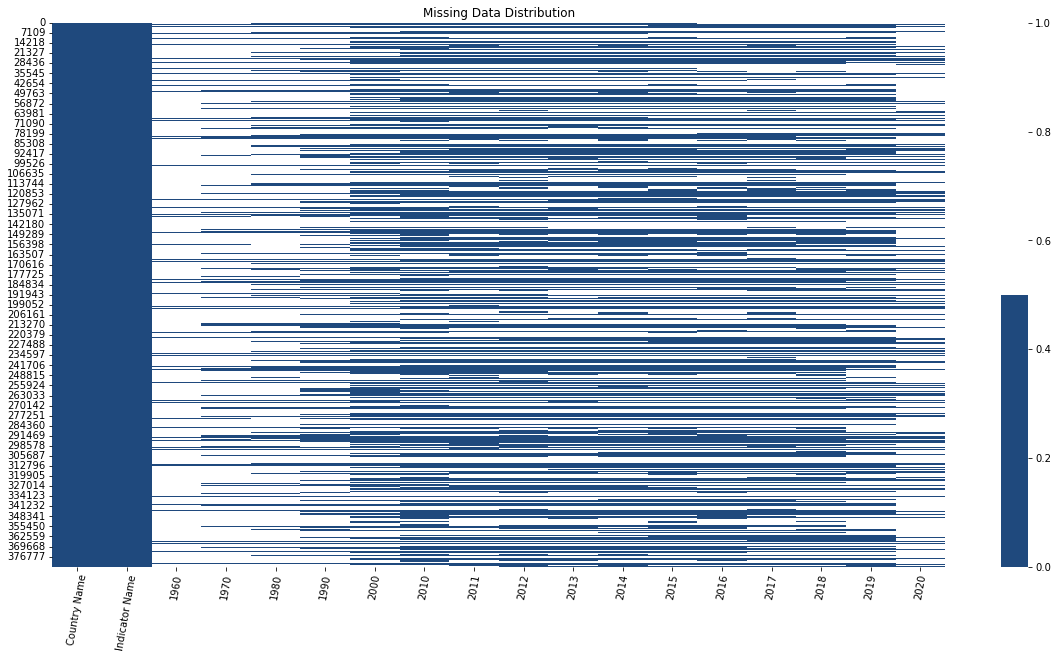

In [5]:
fig, ax = plt.subplots(figsize=(20,10))     
cols = snapshot.columns 
colours = ['#1f497d', '#ffffff'] 
sns.heatmap(snapshot[cols].isnull(), cmap=sns.color_palette(colours))
ax.set_xticklabels(ax.get_xticklabels(),rotation =80)
ax.set_title("Missing Data Distribution")

plt.show()

### 2018 - Seems to have the most data for the more current years

In [6]:
data_2018 = all_data[["Country Name", "Indicator Name", "2018"]]
data = data_2018.rename(columns={'Country Name': 'Country', 'Indicator Name': 'Indicator', '2018': "Data"})
num_countries = data.Country.nunique()
printmd(f"**Number of countries:** {num_countries}")

**Number of countries:** 266

In [7]:
data = data.loc[data['Country'] != "Africa Eastern and Southern"]
data = data.loc[data['Country'] != "Africa Western and Central"]
data = data.loc[data['Country'] != "Arab World"]
data = data.loc[data['Country'] != "Caribbean small states"]
data = data.loc[data['Country'] != "Central Europe and the Baltics"]

data = data.loc[data['Country'] != "Early-demographic dividend"]

data = data.loc[data['Country'] != "East Asia & Pacific"]
data = data.loc[data['Country'] != "East Asia & Pacific (excluding high income)"]
data = data.loc[data['Country'] != "East Asia & Pacific (IDA & IBRD countries)"]
data = data.loc[data['Country'] != "Euro area"]
data = data.loc[data['Country'] != "Europe & Central Asia"]
data = data.loc[data['Country'] != "Europe & Central Asia (excluding high income)"]
data = data.loc[data['Country'] != "Europe & Central Asia (IDA & IBRD countries)"]
data = data.loc[data['Country'] != "European Union"]
data = data.loc[data['Country'] != "Fragile and conflict affected situations"]
data = data.loc[data['Country'] != "Heavily indebted poor countries (HIPC)"]
data = data.loc[data['Country'] != "High income"]
data = data.loc[data['Country'] != "IBRD only"]
data = data.loc[data['Country'] != "IDA & IBRD total"]
data = data.loc[data['Country'] != "IDA blend"]
data = data.loc[data['Country'] != "IDA only"]
data = data.loc[data['Country'] != "IDA total"]
data = data.loc[data['Country'] != "Late-demographic dividend"]
data = data.loc[data['Country'] != "Latin America & Caribbean"]
data = data.loc[data['Country'] != "Latin America & Caribbean (excluding high income)"]
data = data.loc[data['Country'] != "Latin America & the Caribbean (IDA & IBRD countries)"]
data = data.loc[data['Country'] != "Least developed countries: UN classification"]
data = data.loc[data['Country'] != "Low & middle income"]
data = data.loc[data['Country'] != "Low income"]
data = data.loc[data['Country'] != "Lower middle income"]
data = data.loc[data['Country'] != "Middle East & North Africa"]
data = data.loc[data['Country'] != "Middle East & North Africa (excluding high income)"]
data = data.loc[data['Country'] != "Middle East & North Africa (IDA & IBRD countries)"]
data = data.loc[data['Country'] != "Middle income"]
data = data.loc[data['Country'] != "North America"]
data = data.loc[data['Country'] != "Not classified"]
data = data.loc[data['Country'] != "OECD members"]
data = data.loc[data['Country'] != "Other small states"]
data = data.loc[data['Country'] != "Pacific island small states"]
data = data.loc[data['Country'] != "Post-demographic dividend"]
data = data.loc[data['Country'] != "Pre-demographic dividend"]
data = data.loc[data['Country'] != "Small states"]
data = data.loc[data['Country'] != "South Asia"]
data = data.loc[data['Country'] != "South Asia (IDA & IBRD)"]
data = data.loc[data['Country'] != "Sub-Saharan Africa"]
data = data.loc[data['Country'] != "Sub-Saharan Africa (excluding high income)"]
data = data.loc[data['Country'] != "Sub-Saharan Africa (IDA & IBRD countries)"]
data = data.loc[data['Country'] != "Upper middle income"]
data = data.loc[data['Country'] != "World"]

### Possible indicators for us to use in the project.

For specifics about the indicators, go here: 
https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

I tried to use indicators that were percentage of population or per 1,000, so it's relative rather than absolute.

In [8]:
# Economic and access (water, electricity, fuel for cooking) indicators 
cooking_tech =  data[data.Indicator.str.contains("cooking")].reset_index(drop=True)
access_electricity = data[data.Indicator.str.contains("Access to electricity \(% of population\)")].reset_index(drop=True)
income_per_capita = data[data.Indicator.str.contains("net national income per capita")].reset_index(drop=True)
education_expenditure_prim = data[data.Indicator.str.contains("Current education expenditure, primary")].reset_index(drop=True)
drinking_water_services  = data[data.Indicator.str.contains("People using at least basic drinking water services \(% of population")].reset_index(drop=True)
basic_sanitation = data[data.Indicator.str.contains("People using at least basic sanitation services \(% of population\)")].reset_index(drop=True)
nurses_midwives = data[data.Indicator.str.contains("Nurses and midwives")].reset_index(drop=True)
physicians = data[data.Indicator.str.contains("Physicians")].reset_index(drop=True)
undernourishment = data[data.Indicator.str.contains("Prevalence of undernourishment \(% of population")].reset_index(drop=True)
sev_food_insecurity_all = data[data.Indicator.str.contains("Prevalence of severe food insecurity in the population")].reset_index(drop=True)
mod_sev_food_insecurity_all = data[data.Indicator.str.contains("moderate or severe food insecurity in the population")].reset_index(drop=True)
births_skilled_staff = data[data.Indicator.str.contains("Births attended by skilled health staff \(% of total\)")].reset_index(drop=True)
children_unpaid_work = data[data.Indicator.str.contains("Children in employment, unpaid family workers \(% of children in employment, ages 7-14\)")].reset_index(drop=True)
income = data[data.Indicator.str.contains("Adjusted net national income per capita \(current US")].reset_index(drop=True)
out_of_pocket_expense = data[data.Indicator.str.contains("Out-of-pocket expenditure per capita \(current US\$\)")].reset_index(drop=True)

# health indicators
adolescent_fertility_rate = data[data.Indicator.str.contains("Adolescent fertility rate")].reset_index(drop=True)
adolescents_out_of_school = data[data.Indicator.str.contains("Adolescents out of school \(% of lower secondary school age\)")].reset_index(drop=True)
health_expediture = data[data.Indicator.str.contains("Current health expenditure per capita \(current")].reset_index(drop=True)
fertility_rate = data[data.Indicator.str.contains("Fertility rate, total \(births per woman\)")].reset_index(drop=True)
measles_immunization = data[data.Indicator.str.contains("measles")].reset_index(drop=True)
life_expectancy_at_birth_female = data[data.Indicator.str.contains("birth, female")].reset_index(drop=True)
life_expectancy_at_birth_male = data[data.Indicator.str.contains("birth, male")].reset_index(drop=True)
life_expectancy_at_birth_total = data[data.Indicator.str.contains("birth, total")].reset_index(drop=True)
mortality_rate_infant = data[data.Indicator.str.contains("Mortality rate, infant \(")].reset_index(drop=True)
mortality_rate_infant_male = data[data.Indicator.str.contains("Mortality rate, infant, male")].reset_index(drop=True)
mortality_rate_infant_female = data[data.Indicator.str.contains("Mortality rate, infant, female")].reset_index(drop=True)
mortality_rate_under_5 = data[data.Indicator.str.contains("Mortality rate, under-5 \(")].reset_index(drop=True)
mortality_rate_under_5_female = data[data.Indicator.str.contains("Mortality rate, under-5, female")].reset_index(drop=True)
mortality_rate_under_5_male = data[data.Indicator.str.contains("Mortality rate, under-5, male")].reset_index(drop=True)
anemia_children = data[data.Indicator.str.contains("anemia among childre")].reset_index(drop=True)
stunting_height_age = data[data.Indicator.str.contains("Prevalence of stunting, height for age \(modeled")].reset_index(drop=True)
overweight_children_under_5 = data[data.Indicator.str.contains("overweight \(modeled")].reset_index(drop=True)


# education
children_out_of_school = data[data.Indicator.str.contains("Children out of school")].reset_index(drop=True)
children_out_of_school_prim = data[data.Indicator.str.contains("Children out of school, primary")].reset_index(drop=True)
compulsory_education = data[data.Indicator.str.contains("Compulsory education")].reset_index(drop=True)
lower_secondary_school_starting_age = data[data.Indicator.str.contains("secondary school starting age")].reset_index(drop=True)
primary_edu_duration = data[data.Indicator.str.contains("Primary education, duration \(years]\)")].reset_index(drop=True)
primary_starting_age = data[data.Indicator.str.contains("Primary school starting age \(years\)")].reset_index(drop=True)
probability_dying_10_14 = data[data.Indicator.str.contains("Probability of dying among adolescents ages 10-14 years \(per 1,000\)")].reset_index(drop=True)
probability_dying_15_19 = data[data.Indicator.str.contains("Probability of dying among adolescents ages 15-19 years \(per 1,000\)")].reset_index(drop=True)
probability_dying_5_9 = data[data.Indicator.str.contains("Probability of dying among children ages 5-9 years \(per 1,000\)")].reset_index(drop=True)
school_enrollment_preprimary =data[data.Indicator.str.contains("School enrollment, preprimary \(% gross\)")].reset_index(drop=True)

school_enrollment_primary = data[data.Indicator.str.contains("School enrollment, primary \(% gross\)")].reset_index(drop=True)
school_enrollment_secondary = data[data.Indicator.str.contains("School enrollment, secondary \(% gross\)")].reset_index(drop=True)

pre_primary_duration = data[data.Indicator.str.contains("Preprimary education, duration \(years\)")].reset_index(drop=True)
primary_ed_duration = data[data.Indicator.str.contains("Primary education, duration")].reset_index(drop=True)
children_not_in_school_primary = data[data.Indicator.str.contains("Children out of school \(% of primary school age\)")].reset_index(drop=True)


# Additional Indicators we can add are listed at the bottom
population_14 = data[data.Indicator.str.contains("Population ages 0-14 \(% of total ")].reset_index(drop=True)



### How much data is missing per indicator

Below I checked the output of each indicator to see what percentage of data is missing. For example, for "Access to clearn fuels and technologies for cooking" - (cooking_tech), there is no data for 11% of the countries in the dataset. I think a good line in the sand is to focus on indicators for which at least 20% of the countries have data. Thoughts? **There are a few that don't meet this criteria below.



In [9]:
# Economic and access (water, electricity, fuel for cooking) indicators 
indicators = [cooking_tech,
    access_electricity,
    income_per_capita,
    education_expenditure_prim,
    drinking_water_services,
    basic_sanitation,
    nurses_midwives,
    physicians,
    births_skilled_staff,
    undernourishment,
    sev_food_insecurity_all,
    mod_sev_food_insecurity_all,
    adolescent_fertility_rate,
    adolescents_out_of_school,
    health_expediture ,
    fertility_rate ,
    measles_immunization ,
    life_expectancy_at_birth_female,
    life_expectancy_at_birth_male, 
    life_expectancy_at_birth_total,
    mortality_rate_infant,
    mortality_rate_infant_male,
    mortality_rate_infant_female,
    mortality_rate_under_5,
    mortality_rate_under_5_female,
    mortality_rate_under_5_male,
    anemia_children,
    stunting_height_age,
    overweight_children_under_5,
    children_out_of_school,
    children_out_of_school_prim ,
    compulsory_education,
    primary_starting_age,
    probability_dying_10_14,
    probability_dying_15_19,
    probability_dying_5_9,
    school_enrollment_preprimary,
    school_enrollment_primary,
    school_enrollment_secondary,
    pre_primary_duration,
    primary_ed_duration,
    population_14,
    children_not_in_school_primary,
    children_unpaid_work,
    income,
    out_of_pocket_expense]



In [10]:
for i in indicators:
    pct_missing = np.mean(i["Data"].isnull())
    printmd(f" **{i.Indicator[0]}:**  {round(pct_missing*100)}%")


 **Access to clean fuels and technologies for cooking (% of population):**  13%

 **Access to electricity (% of population):**  0%

 **Adjusted net national income per capita (annual % growth):**  28%

 **Current education expenditure, primary (% of total expenditure in primary public institutions):**  67%

 **People using at least basic drinking water services (% of population):**  6%

 **People using at least basic sanitation services (% of population):**  9%

 **Nurses and midwives (per 1,000 people):**  43%

 **Physicians (per 1,000 people):**  56%

 **Births attended by skilled health staff (% of total):**  71%

 **Prevalence of undernourishment (% of population):**  26%

 **Prevalence of severe food insecurity in the population (%):**  50%

 **Prevalence of moderate or severe food insecurity in the population (%):**  50%

 **Adolescent fertility rate (births per 1,000 women ages 15-19):**  11%

 **Adolescents out of school (% of lower secondary school age):**  47%

 **Current health expenditure per capita (current US$):**  14%

 **Fertility rate, total (births per woman):**  8%

 **Immunization, measles (% of children ages 12-23 months):**  12%

 **Life expectancy at birth, female (years):**  9%

 **Life expectancy at birth, male (years):**  9%

 **Life expectancy at birth, total (years):**  9%

 **Mortality rate, infant (per 1,000 live births):**  11%

 **Mortality rate, infant, male (per 1,000 live births):**  11%

 **Mortality rate, infant, female (per 1,000 live births):**  11%

 **Mortality rate, under-5 (per 1,000 live births):**  11%

 **Mortality rate, under-5, female (per 1,000 live births):**  11%

 **Mortality rate, under-5, male (per 1,000 live births):**  11%

 **Prevalence of anemia among children (% of children ages 6-59 months):**  12%

 **Prevalence of stunting, height for age (modeled estimate, % of children under 5):**  29%

 **Prevalence of overweight (modeled estimate, % of children under 5):**  29%

 **Children out of school (% of primary school age):**  57%

 **Children out of school, primary:**  59%

 **Compulsory education, duration (years):**  9%

 **Primary school starting age (years):**  3%

 **Probability of dying among adolescents ages 10-14 years (per 1,000):**  11%

 **Probability of dying among adolescents ages 15-19 years (per 1,000):**  11%

 **Probability of dying among children ages 5-9 years (per 1,000):**  11%

 **School enrollment, preprimary (% gross):**  32%

 **School enrollment, primary (% gross):**  32%

 **School enrollment, secondary (% gross):**  42%

 **Preprimary education, duration (years):**  8%

 **Primary education, duration (years):**  3%

 **Population ages 0-14 (% of total population):**  11%

 **Children out of school (% of primary school age):**  38%

 **Children in employment, unpaid family workers (% of children in employment, ages 7-14):**  100%

 **Adjusted net national income per capita (current US$):**  19%

 **Out-of-pocket expenditure per capita (current US$):**  14%

In [11]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [12]:
access_electricity.set_index('Country')
education_expenditure_prim.set_index('Country')
drinking_water_services.set_index('Country')
basic_sanitation.set_index('Country')
measles_immunization.set_index('Country')
mortality_rate_under_5.set_index('Country')
probability_dying_10_14.set_index('Country')
probability_dying_15_19.set_index('Country')
probability_dying_5_9.set_index('Country')
cooking_tech.set_index('Country')
compulsory_education.set_index("Country")

,Indicator,Data
Country,,
Afghanistan,"Compulsory education, duration (years)",9.0
Albania,"Compulsory education, duration (years)",9.0
Algeria,"Compulsory education, duration (years)",10.0
American Samoa,"Compulsory education, duration (years)",NaN
Andorra,"Compulsory education, duration (years)",10.0
...,...,...
Virgin Islands (U.S.),"Compulsory education, duration (years)",NaN
West Bank and Gaza,"Compulsory education, duration (years)",10.0
"Yemen, Rep.","Compulsory education, duration (years)",9.0


In [13]:
data_df = pd.concat([cooking_tech.iloc[:,0],
                  cooking_tech.iloc[:,2],
               access_electricity.iloc[:,2],
               education_expenditure_prim.iloc[:,2],
               drinking_water_services.iloc[:,2],
                basic_sanitation.iloc[:,2],
                measles_immunization.iloc[:,2],
                mortality_rate_under_5.iloc[:,2],
                probability_dying_5_9.iloc[:,2],
                probability_dying_10_14.iloc[:,2],
                probability_dying_15_19.iloc[:,2],
                compulsory_education.iloc[:,2]
                  
              
              ], axis=1)

In [14]:
data_df

,Country,Data,Data,Data,Data,Data,Data,Data,Data,Data,Data,Data
0,Afghanistan,34.099998,98.715622,NaN,69.601931,47.390662,64.0,62.3,3.2,2.4,13.5,9.0
1,Albania,79.699997,100.000000,99.151772,94.436391,98.973644,94.0,9.5,1.0,1.1,1.8,9.0
2,Algeria,99.300003,99.641922,NaN,94.037413,86.303092,80.0,23.8,1.8,1.7,2.7,10.0
3,American Samoa,NaN,NaN,NaN,99.773772,54.454760,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,100.000000,100.000000,99.154060,100.000001,100.000001,99.0,2.8,0.3,0.4,1.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),NaN,100.000000,NaN,98.718267,99.371278,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,NaN,99.990372,NaN,97.289425,97.637751,NaN,17.5,1.8,1.9,3.7,10.0
214,"Yemen, Rep.",61.000000,62.000000,NaN,58.754491,53.127016,64.0,61.6,4.3,2.8,9.6,9.0
215,Zambia,15.700000,39.822304,NaN,63.804111,31.052407,94.0,65.4,7.3,4.5,9.9,7.0


In [15]:
header = ['Country', 'Cooking Tech', 'Access to Electricity', 'Education Expenditure', 'Access to Drinking Water'
          , 'Basic Sanitation', 'Measles Immunization', "Mortality Rate < 5",'Probability of Dying 5-9','Probability of Dying 10-14', 'Probability of Dying 15-19', 'Compulsory Education' 
         ]

data_df.columns = header

In [16]:
data_df = data_df.fillna("0")

In [17]:
data

,Country,Indicator,Data
70707,Afghanistan,Access to clean fuels and technologies for coo...,34.099998
70708,Afghanistan,Access to electricity (% of population),98.715622
70709,Afghanistan,"Access to electricity, rural (% of rural popul...",98.309603
70710,Afghanistan,"Access to electricity, urban (% of urban popul...",99.902145
70711,Afghanistan,Account ownership at a financial institution o...,NaN
...,...,...,...
383833,Zimbabwe,Women who believe a husband is justified in be...,NaN
383834,Zimbabwe,Women who were first married by age 15 (% of w...,NaN
383835,Zimbabwe,Women who were first married by age 18 (% of w...,NaN
383836,Zimbabwe,Women's share of population ages 15+ living wi...,60.000000


In [18]:
data_df.iloc[:,2:12] = data_df.iloc[:,2:12].astype(float, errors = 'raise')


In [19]:
data_df

,Country,Cooking Tech,Access to Electricity,Education Expenditure,Access to Drinking Water,Basic Sanitation,Measles Immunization,Mortality Rate < 5,Probability of Dying 5-9,Probability of Dying 10-14,Probability of Dying 15-19,Compulsory Education
0,Afghanistan,34.099998,98.715622,0.000000,69.601931,47.390662,64.0,62.3,3.2,2.4,13.5,9.0
1,Albania,79.699997,100.000000,99.151772,94.436391,98.973644,94.0,9.5,1.0,1.1,1.8,9.0
2,Algeria,99.300003,99.641922,0.000000,94.037413,86.303092,80.0,23.8,1.8,1.7,2.7,10.0
3,American Samoa,0,0.000000,0.000000,99.773772,54.454760,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,100.0,100.000000,99.154060,100.000001,100.000001,99.0,2.8,0.3,0.4,1.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),0,100.000000,0.000000,98.718267,99.371278,0.0,0.0,0.0,0.0,0.0,0.0
213,West Bank and Gaza,0,99.990372,0.000000,97.289425,97.637751,0.0,17.5,1.8,1.9,3.7,10.0
214,"Yemen, Rep.",61.0,62.000000,0.000000,58.754491,53.127016,64.0,61.6,4.3,2.8,9.6,9.0
215,Zambia,15.7,39.822304,0.000000,63.804111,31.052407,94.0,65.4,7.3,4.5,9.9,7.0


In [20]:
data_dict = data_df.to_dict(orient = "records")


In [21]:
db = client["WDI_db"]